# Multi-layer Perceptron (MLP) Classifier

In [1]:
import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# using sci-kit learn for classifiers
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split  # to split data randomly into test, train datasets
from sklearn import metrics


In [2]:
# read in signal and background data from txt files and assign target values

# SIGNAL DATA, (target value =1)
sig_data=np.loadtxt('signal10k.txt')
sig_target=np.ones(sig_data.shape[0]) # counts the number of rows in sig_data and makes a new array of 1s of that size

# BACKGROUND DATA, (target value =0)
bkg_data=np.loadtxt('background10k.txt')
bkg_target=np.zeros(bkg_data.shape[0])    # does the same as above, but fills array with 0s instead


In [3]:
# concatenate sig and bkg data into one array, then randomly split data set in half to have training and test data

X=np.concatenate((sig_data,bkg_data),0)  # join sig and bkg data on axis 0 (meaning on same plane)
Y=np.concatenate((sig_target,bkg_target),0)


# to see scatter plots, only include x1 and x2 from sig data set: (remove this line to include all 3 features)
X=X[:,0:2]


# split array into random test and training datasets:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.5, random_state=1)  # set random_state=1 to keep the same value assignment throughout the program re-runs


### An Aside on: test_train_split
Returns 2 sets of data (train and test): X data with its corresponding target values(our Y)- in this case 0 or 1 depending on if sig or bkg

#### test_size:
indicates the proportion of the data you want to assign to the test data (value ranges from 0-1)

#### random_state:

if you want to get the same values every time you re-run the python script, you want to set the 'random_state' to a certain integer. If not, the values you get from calculations later will be different everytime you re-run the program. NOTE: the data values are still randomly assigned, but it just keeps the first random assignment that was made throughout re-running the program.

random_state = 1   -> is used so that if there are any changes to results in the program, you know it doesn't come from a difference in splitting the data at the start :)

NOTE: the value of the random_state value doesn't matter, it just acts as a 'PLACE HOLDER', in the sense that it just keeps track of what it assigned in the first place. 

#####  AFTER ML FULLY TRAINED:
You can remove the random_state after ML is fully trained->to get a different result each time->then take an average to get a more true reflection of the final result/performance.

In [4]:
# code MLP classifier+training

hidden_layers=(7,7,7)
activation_type='tanh'
iterations=2000

clf_name='MLP Classifier'
clf = MLPClassifier(hidden_layer_sizes=(7,7,7), activation='tanh',
                    max_iter=2000, random_state=0)

#clf= MLPClassifier(hidden_layer_sizes=hidden_layers, activation=activation_type, max_iter=iterations, random_state=1)
clf.fit(X_train, Y_train)

# evaluate accuracy:
Y_predict=clf.predict(X_test)
accuracy=metrics.accuracy_score(Y_test, Y_predict)
print('MLP classification accuracy=', metrics.accuracy_score(Y_test, Y_predict))


MLP classification accuracy= 0.8912


No handles with labels found to put in legend.


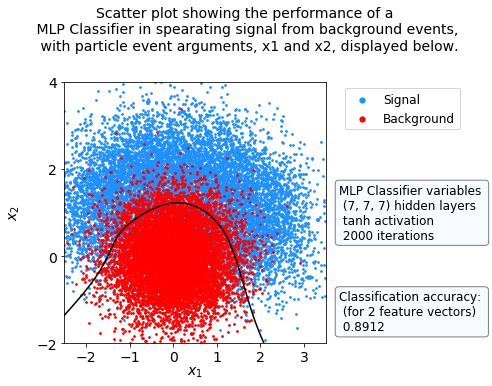

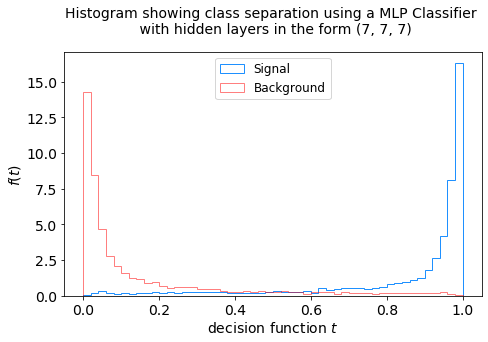

In [30]:
# Plot scatter plot to visualise
print=metrics.accuracy_score(Y_test,Y_train)

fig, ax =plt.subplots(1,1, figsize=(7,7))

plt.title('Scatter plot showing the performance of a \n {} in spearating signal from background events, \n with particle event arguments, x1 and x2, displayed below.'.format(clf_name),
         fontsize=14, x=0.7, y=1.1)

# Text box properties:
props = dict(boxstyle='round', facecolor='aliceblue', alpha=0.5)
ax.text(1.05, 0.05, 'Classification accuracy: \n (for 2 feature vectors) \n {}'.format(accuracy), transform=ax.transAxes, fontsize=12,
        horizontalalignment='left', bbox=props)

ax.text(1.05, 0.4, '{} variables \n {} hidden layers \n {} activation \n {} iterations'.format(clf_name, hidden_layers,activation_type,iterations), 
        transform=ax.transAxes, fontsize=12,
        horizontalalignment='left', bbox=props)


# formating plots
#plt.gcf().subplots_adjust(bottom=0.15)
#plt.gcf().subplots_adjust(left=0.15)    # gcf = get current figure

ax.set_xlim((-2.5,3.5))
ax.set_ylim((-2,4))
x0,x1= ax.get_xlim()
y0,y1= ax.get_ylim()

ax.set_aspect(abs(x1-x0)/abs(y1-y0))    # make a square plot , abs = returns absolute value

xtick_spacing=0.5
ytick_spacing=2.0
ax.yaxis.set_major_locator(ticker.MultipleLocator(xtick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(ytick_spacing))
plt.scatter(sig_data[:,0], sig_data[:,1], s=3, color='dodgerblue', marker='o', label='Signal')
plt.scatter(bkg_data[:,0], bkg_data[:,1], s=3, color='red', marker='o', label='Background')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',markerscale=3, fontsize=12)

# set decision boundaries to scatter plot
x_min, x_max = X[:, 0].min()- .5, X[:, 0].max()+.5
y_min, y_max = X[:, 1].min()- .5, X[:, 1].max()+.5
h=.01 # mesh step size
xx,yy=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max,h))  # returns coordinates matricies for x and y on plot


# REMOVE the following code if want to include all 3 x-axis: from here
Z=clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])[:, 1]    # returns prob. of the concatenated array (np.c_) along 2nd axis
                                                           # of the flattened 1D arrays of the meshgrid xx and yy (ravel)
if hasattr(clf, "decision_function"):
    Z=clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
else:
    Z=clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])[:, 1]
# till here ^^

# CLASSIFIER contour:
Z=Z.reshape(xx.shape)   # changes the shape of the xx array
plt.contour(xx,yy,Z,1,colors='k')   # arguments are: xx,yy,Z. Level= 1 means number of contour lines
plt.xlabel(r'$x_{1}$', labelpad=0)
plt.ylabel(r'$x_{2}$', labelpad=15)

plt.tight_layout()
plt.savefig("{}_{}_scatterplot.pdf".format(clf_name, hidden_layers), format='pdf', pad_inches=2)




# HISTOGRAM:
plt.figure(figsize=(7,5))      # new window
matplotlib.rcParams.update({'font.size':14})   # sets all font sizes
plt.title('Histogram showing class separation using a {} \n with hidden layers in the form {}'.format(clf_name,hidden_layers), x=0.5, y=1.05, fontsize=14)


# TESTS:
# depends on classifier, use predict_proba or decision_function
if hasattr(clf, "decision_function"):
    tTest= clf.decision_function(X_test)
else:
    tTest= clf.predict_proba(X_test)[:,1]

# find probabilities of the test data being background or signal
tBkg=tTest[Y_test==0]   # where our test data is actually background
tSig=tTest[Y_test==1]   # where test data is signal 

nBins=50
tMin=np.floor(np.min(tTest))
tMax=np.ceil(np.max(tTest))
bins=np.linspace(tMin, tMax, nBins+1)

plt.xlabel('decision function $t$', labelpad=3)
plt.ylabel('$f(t)$', labelpad=3)
plt.legend()

n, bins, patches = plt.hist(tSig, bins=bins, density=True, histtype='step', fill=False, color='dodgerblue', label='Signal')
n, bins, patches = plt.hist(tBkg, bins=bins, density=True, histtype='step', fill=False, color='red', alpha=0.5, label='Background')
plt.legend(fontsize=12, loc='upper center')

plt.tight_layout()
plt.savefig("{}_{}_decision_function_hist.pdf".format(clf_name, hidden_layers), format='pdf')
plt.show()